<a href="https://colab.research.google.com/github/Tarunsri1998/INTERENSHIP-PROJECT--Rental-Bike-Sharing-Demand/blob/main/Rental_Bike_Share_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
  # Loading the Dataset
bike_df=pd.read_csv('/content/drive/MyDrive/Intrenship Project/hour.csv',encoding ='latin')    

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Shape of the Dataset
bike_df.shape

(17379, 17)

In [5]:
# All column Names
print('Features of the Dataset:')
bike_df.columns

Features of the Dataset:


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Deatails about the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Description of the Dataset to know the insights of the Dataset
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [8]:
# To know the unique values in the Dataset
bike_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

###**(ii) PRE-PROCESSING OF THE DATSET**

###**1. Missing Values**

The real-world data often has a lot of missing values. The missing values can cause data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

In [9]:
#check for count of missing values in each column.
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Thankfully there is no NULL Values in the Dataset**

###**2. Duplicate Values**

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [10]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


###**3. Changing Column Names**

Some of the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results.



In [11]:
#Rename the some columns name
bike_df = bike_df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [ ]:
bike_df.head()


,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
#Create a Copy of the dataframe
df=bike_df.copy()

In [13]:
df1=bike_df.copy()

In [14]:
# inspecting the df 
df1.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
# drop columns instant, dteday and year from dataset
df1 = df1.drop(columns=['instant', 'dteday', 'year'])

In [16]:
df1.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###**4. Changing Data types.**

As 'season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather' column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

In [17]:
#Change the int64 column into catagory column
cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df1[col] = df1[col].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


EDA

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

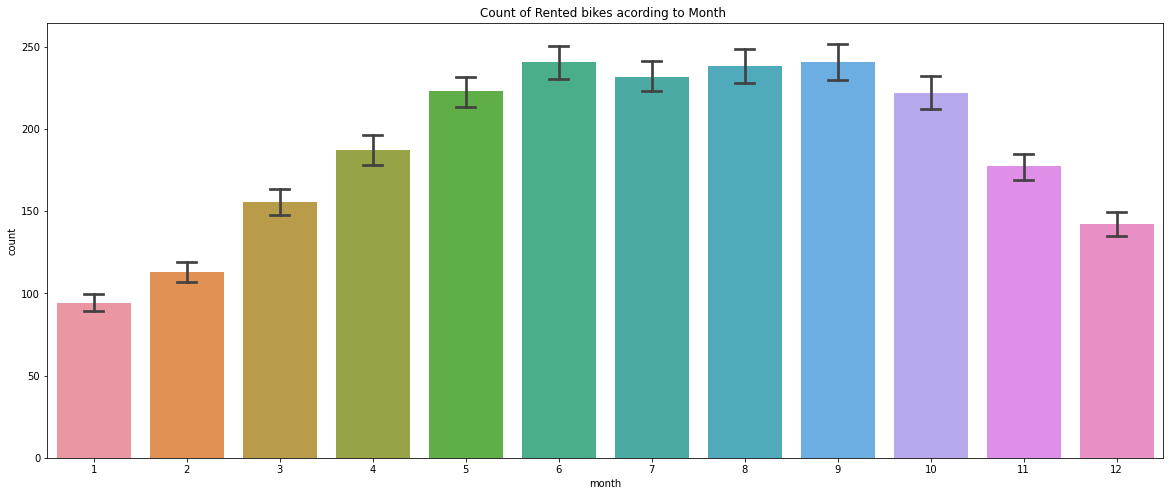

In [18]:
#Anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df1,x='month',y='count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

**From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays')]

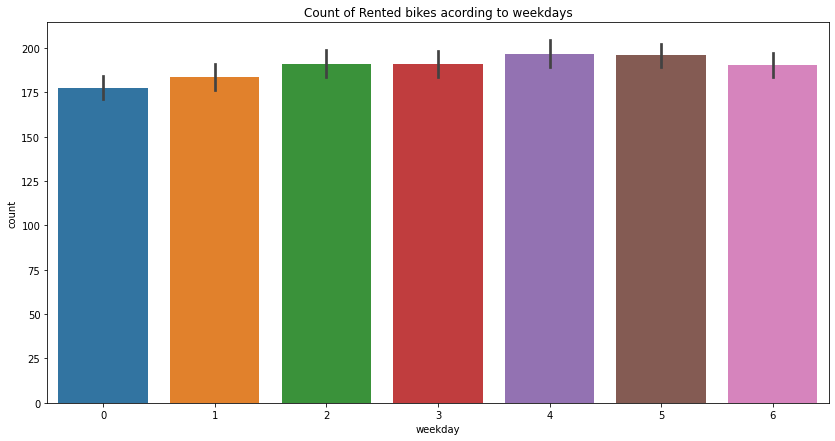

In [19]:
# Anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(data=df1,x='weekday',y='count')
ax.set(title='Count of Rented bikes acording to weekdays')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekends')]

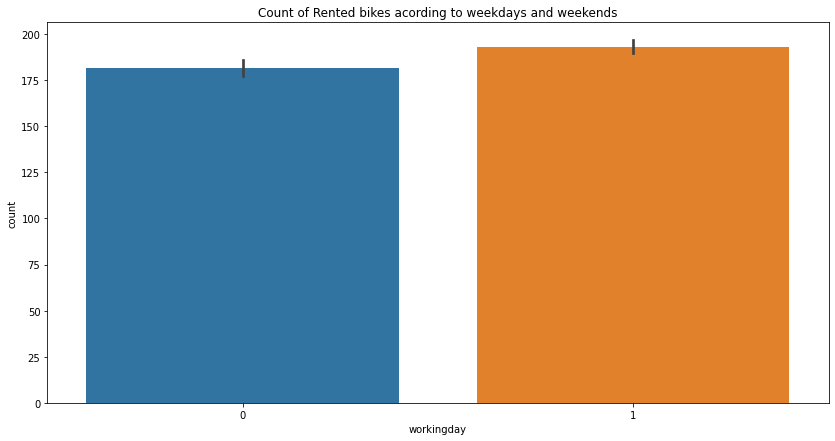

In [20]:
# Anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(data=df1,x='workingday',y='count')
ax.set(title='Count of Rented bikes acording to weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

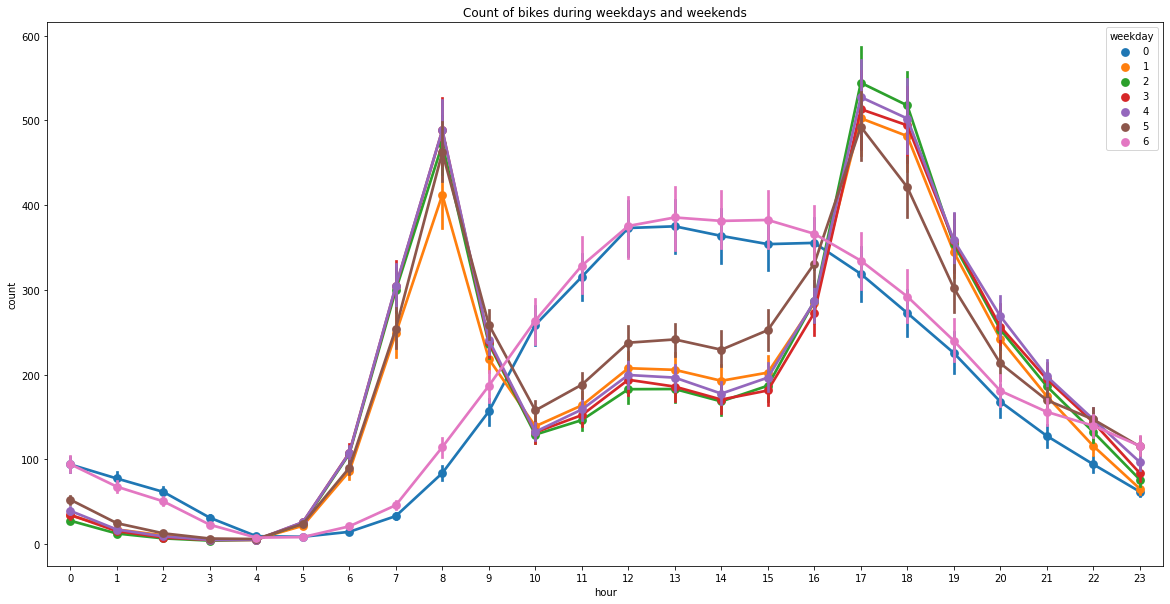

In [21]:
#Anlysis of data by vizualisation by Point-Line plot
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

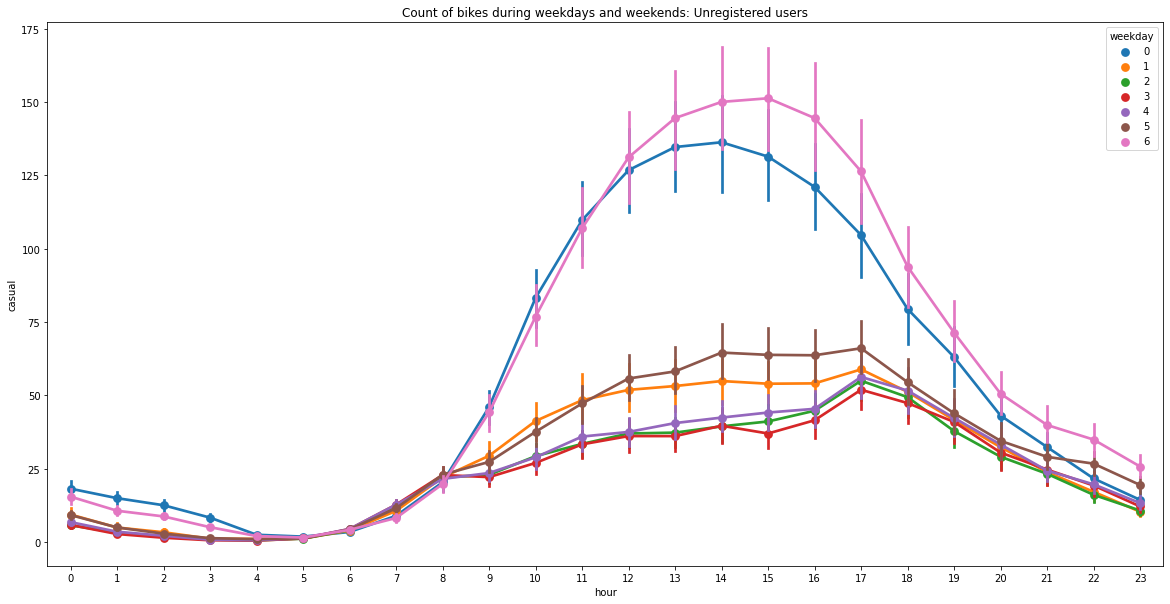

In [22]:
#Anlysis of data by vizualisation by Point-Line plot for Unregistered users
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

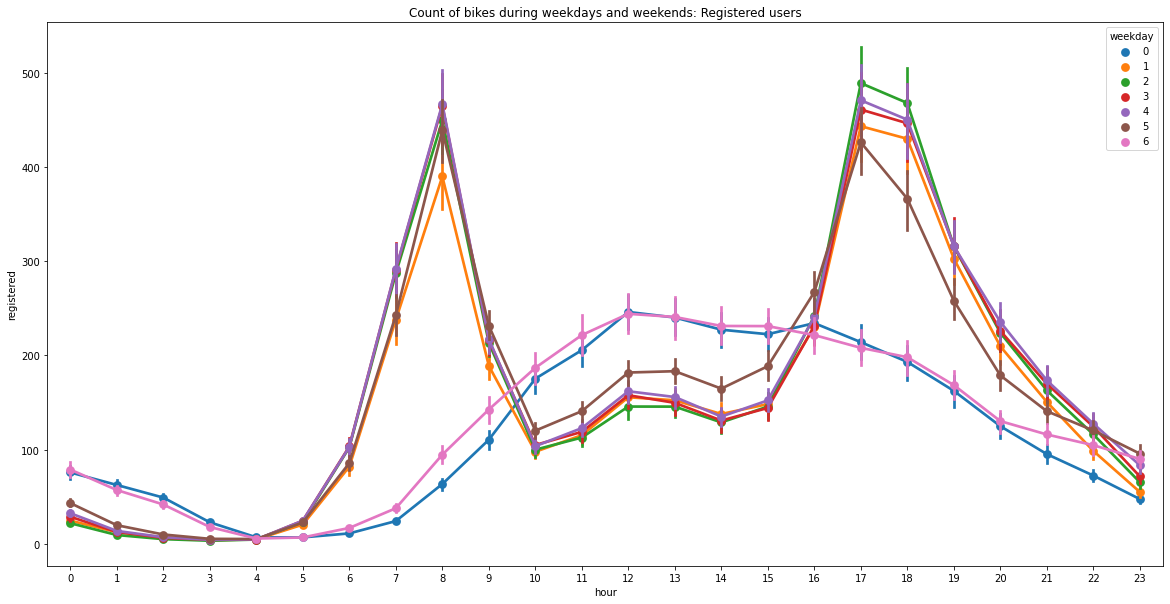

In [23]:
#Anlysis of data by vizualisation by Point-Line plot for Registered users
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

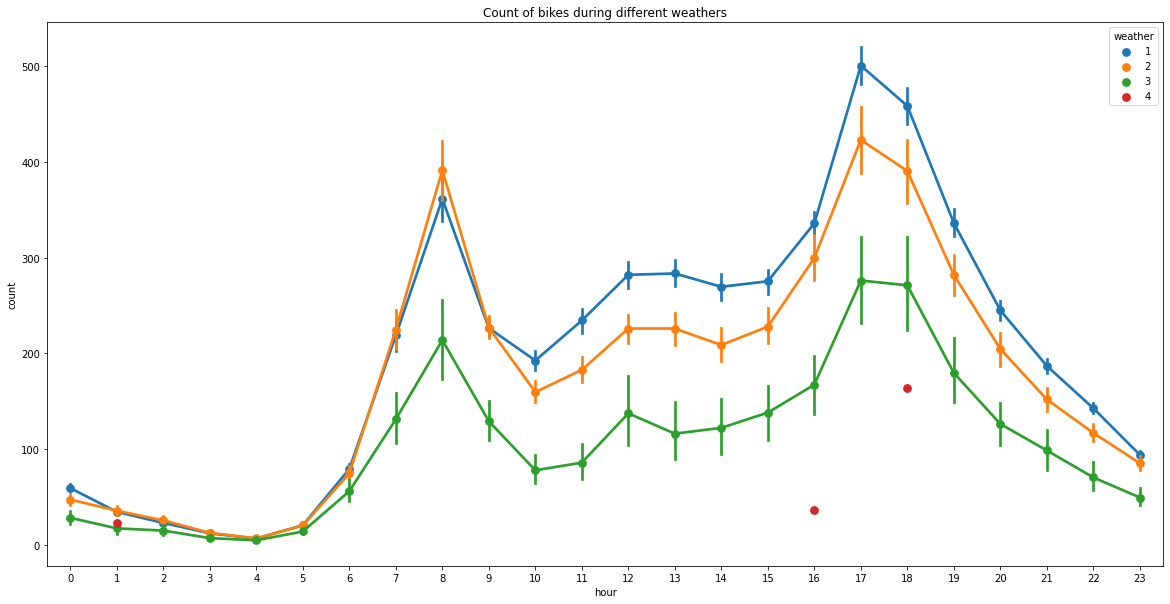

In [24]:
#Anlysis of data by vizualisation by Point-Line plot for Different Weather Condtitions
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

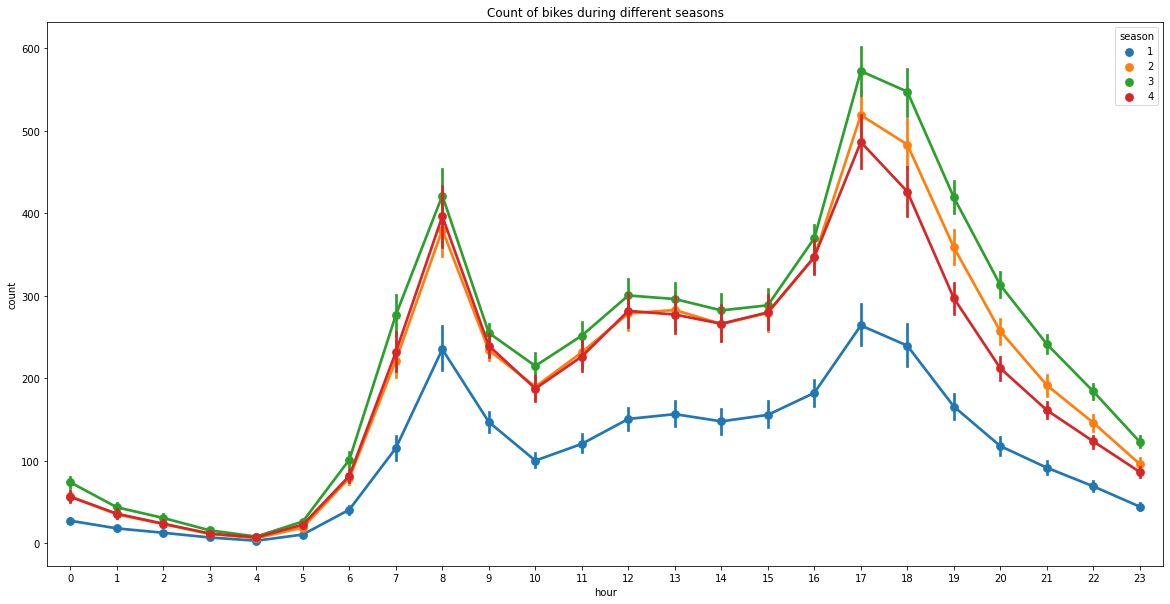

In [25]:
#Anlysis of data by vizualisation by Point-Line plot for Different Seasons
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

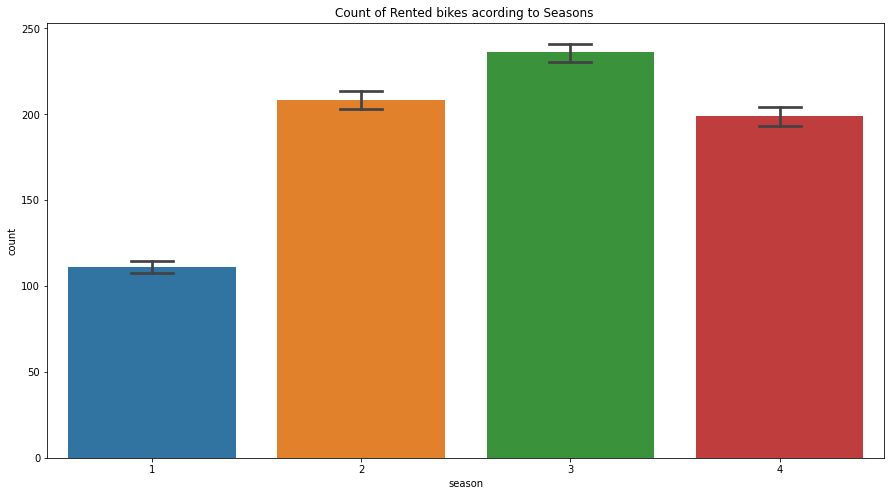

In [26]:
#Anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df1,x='season',y='count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

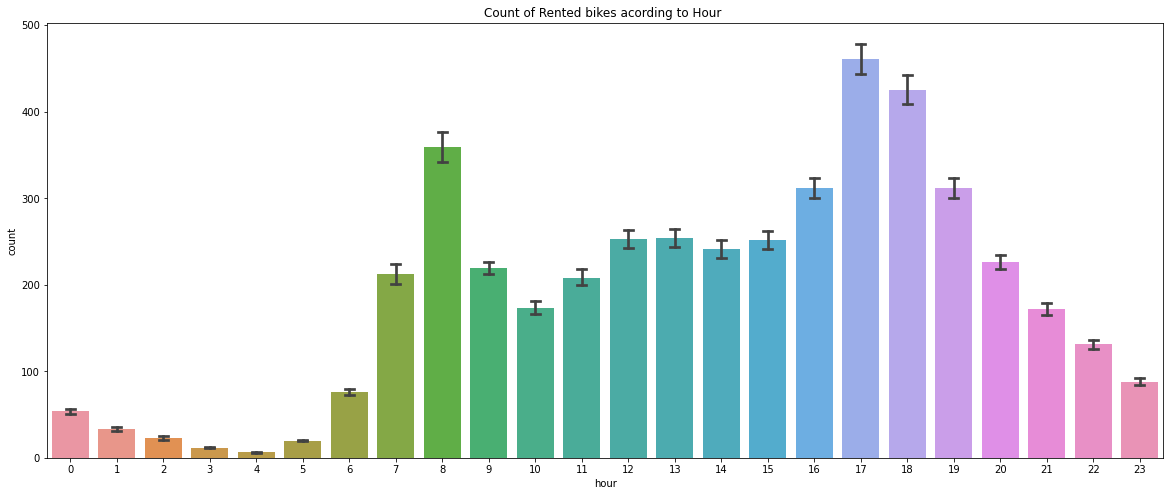

In [27]:
#Anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df1,x='hour',y='count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

In [28]:
df1.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


[Text(0.5, 1.0, 'Relation between humidity and users')]

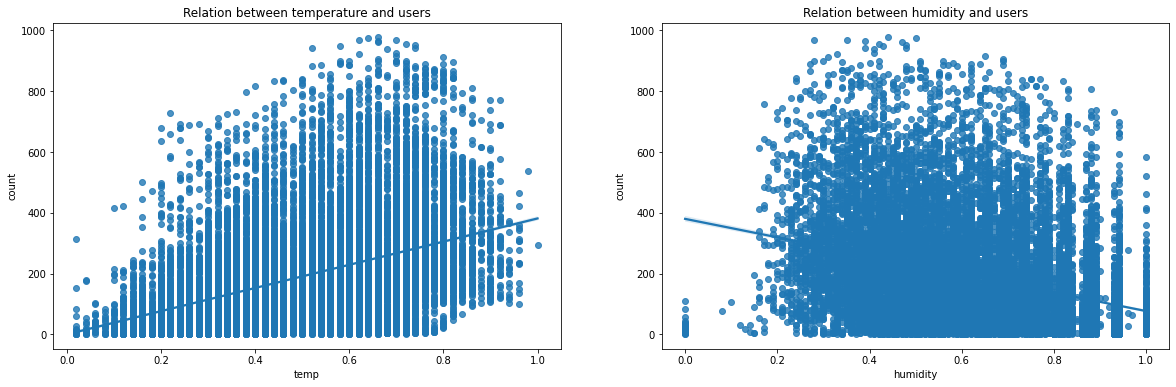

In [29]:
# To Plot the Relation between Temparature and Users
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df1['temp'], y=df1['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")

# To Plot the Relation between Humidity and Users
sns.regplot(x=df1['humidity'], y=df1['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

In [30]:
#Assign the numerical coulmn to variavle
numerical_columns=list(df1.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

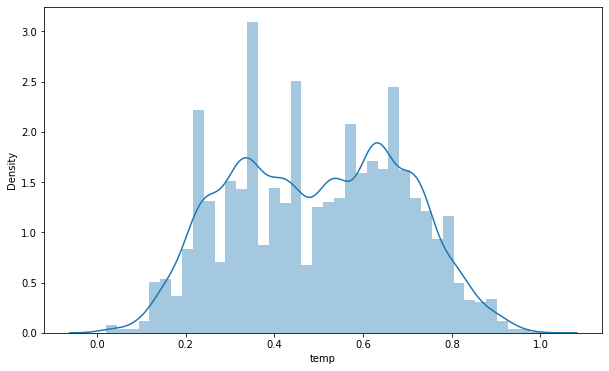

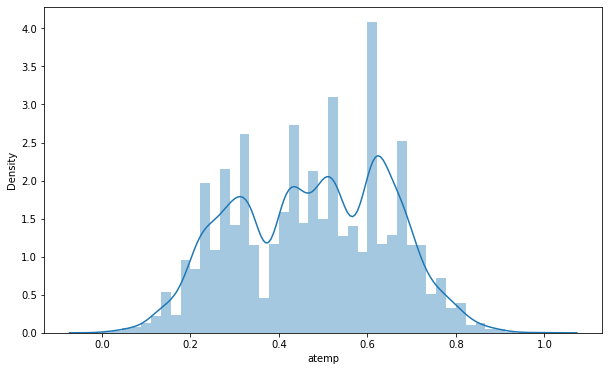

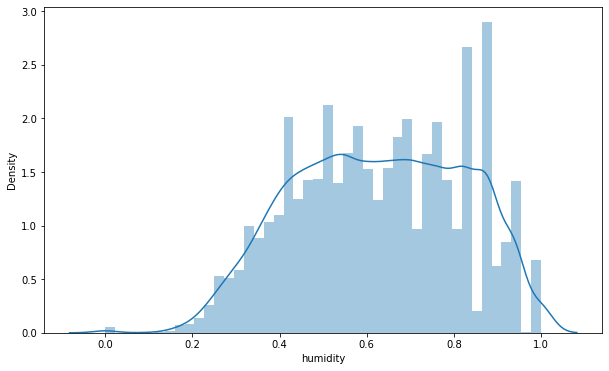

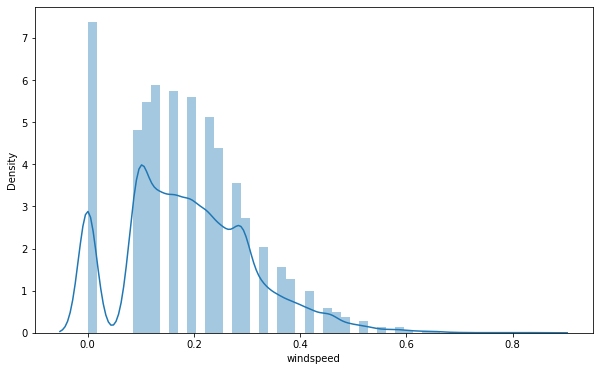

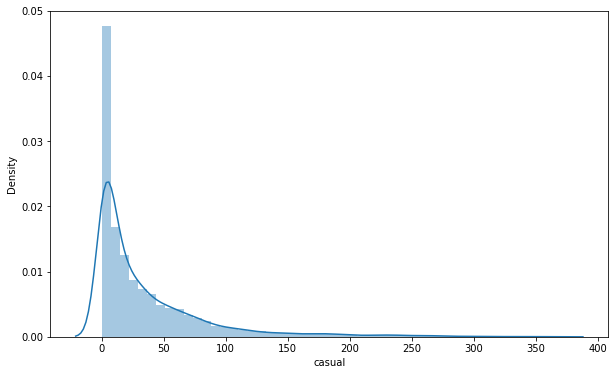

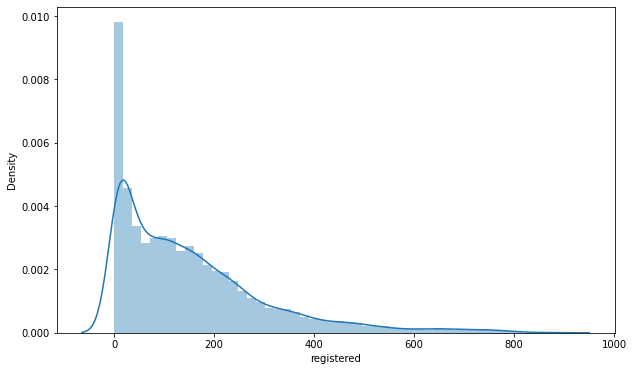

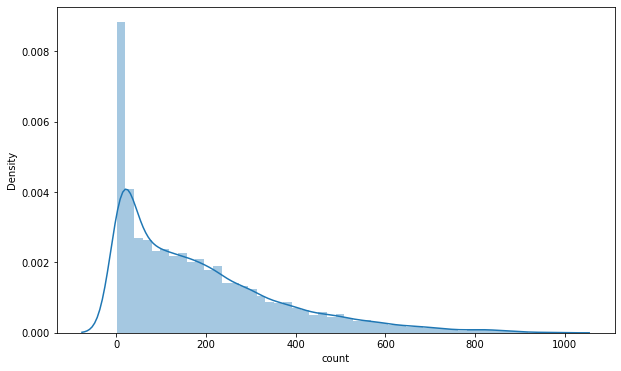

In [31]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

[Text(0.5, 1.0, 'Distribution of the users')]

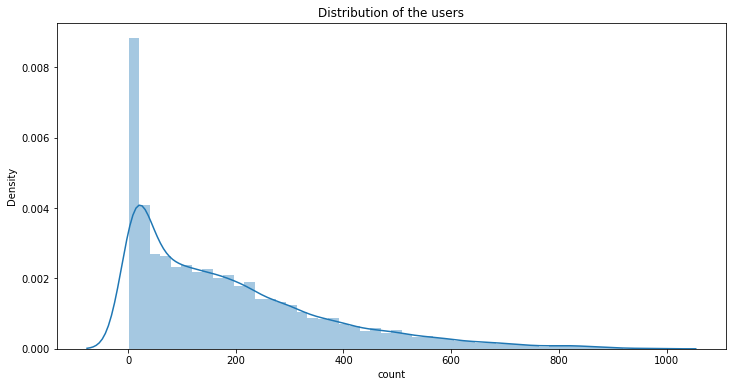

In [32]:
# Distribution of the users
from statsmodels.graphics.gofplots import qqplot
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
sns.distplot(df1['count'], ax=ax1)
ax1.set(title='Distribution of the users')

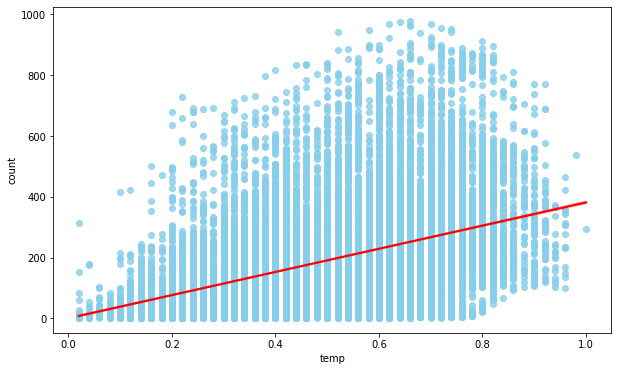

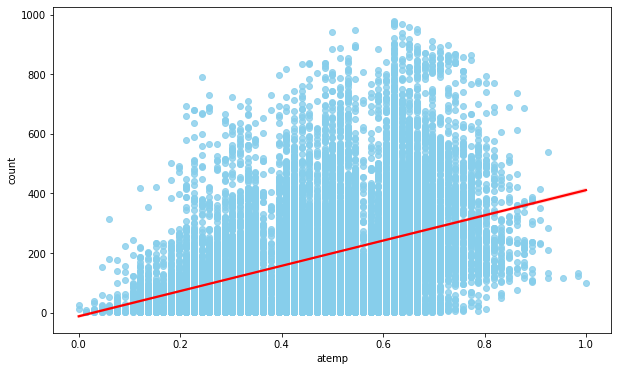

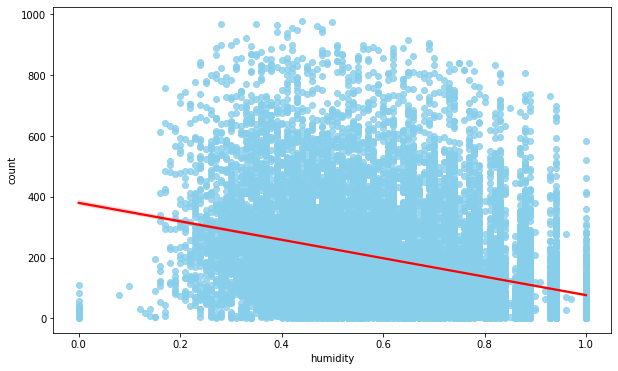

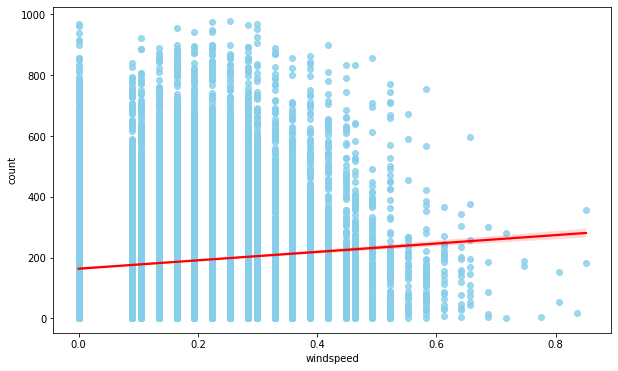

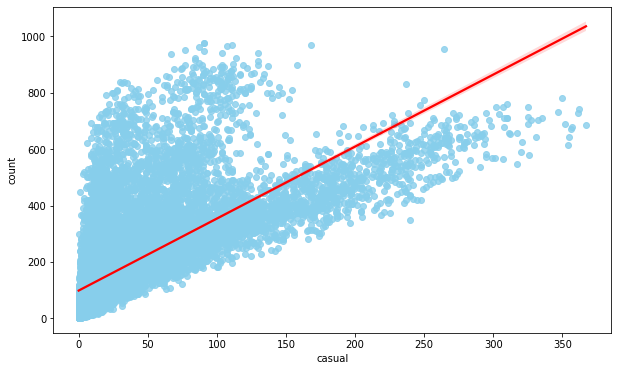

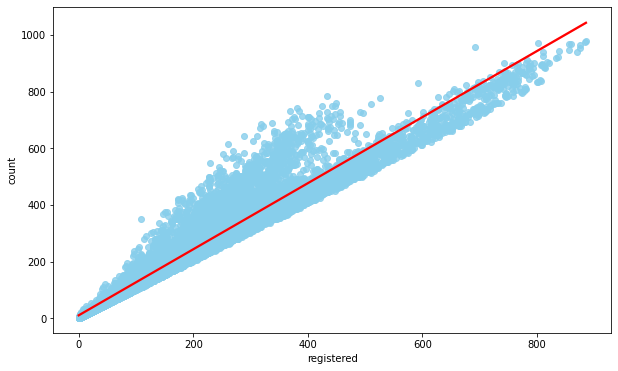

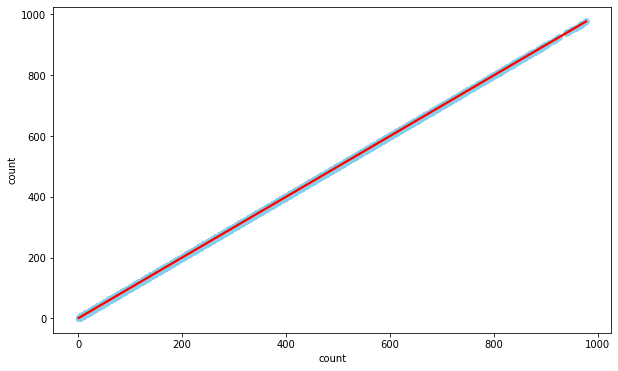

In [33]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df1[col],y=df1['count'],scatter_kws={"color": 'skyblue'}, line_kws={"color": "red"})

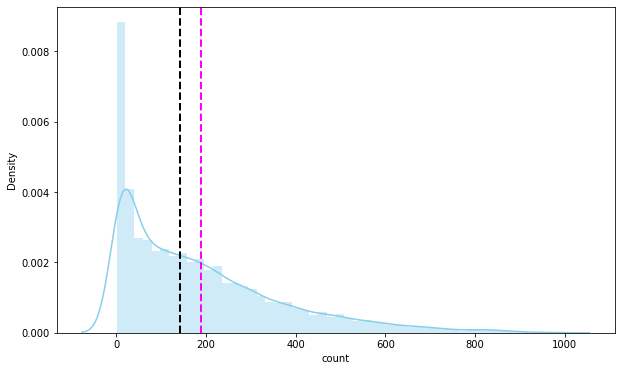

In [34]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('count')
plt.ylabel('Density')
ax=sns.distplot(df1['count'],hist=True ,color="skyblue")
ax.axvline(df1['count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df1['count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

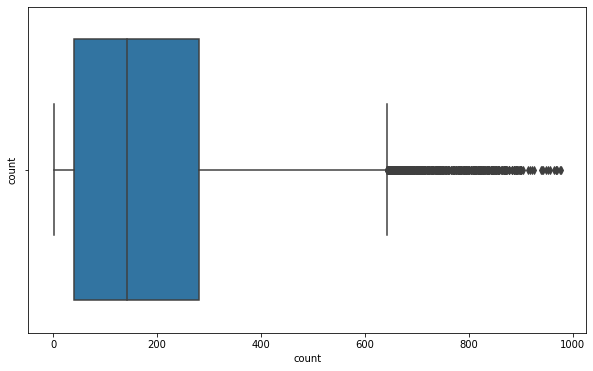

In [35]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('count')
sns.boxplot(x=df1['count'])
plt.show()

####**The above boxplot shows that we have detect outliers in Rented Bike Count column.**

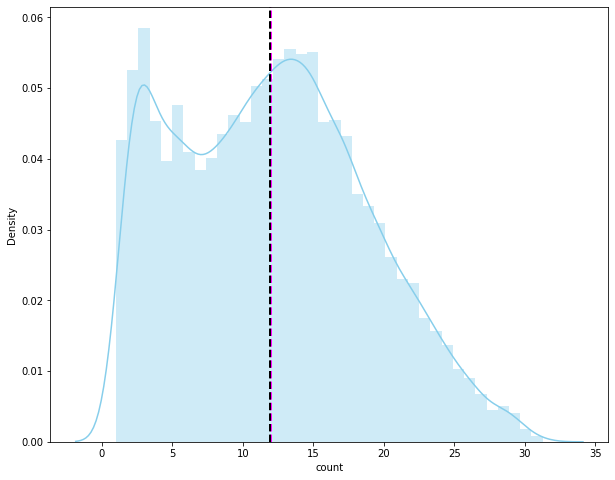

In [36]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df1['count']), color="skyblue")
ax.axvline(np.sqrt(df1['count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df1['count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

####**After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**

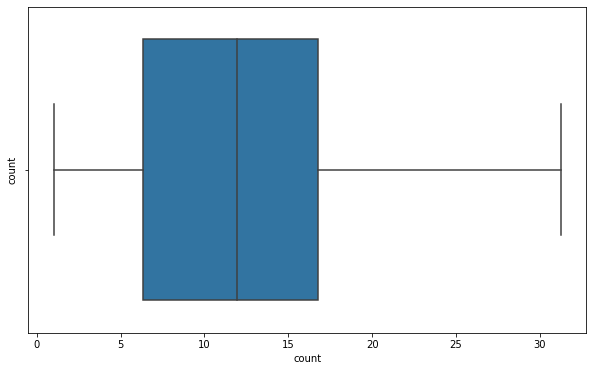

In [37]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('count')
sns.boxplot(x=np.sqrt(df1['count']))
plt.show()

#####**The above Box Plot shows that there is no Outliers**

In [38]:
df1.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
count,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


**After applying the Squre-root to Bike Rented Column we can see that absence of Outliers.**

####**CHECKING THE CORRELATION BETWEEN THE VARIABLES**

**Checking in OLS Model**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [39]:
df1.columns

Index(['season', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

##**HEAT MAP**

we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables

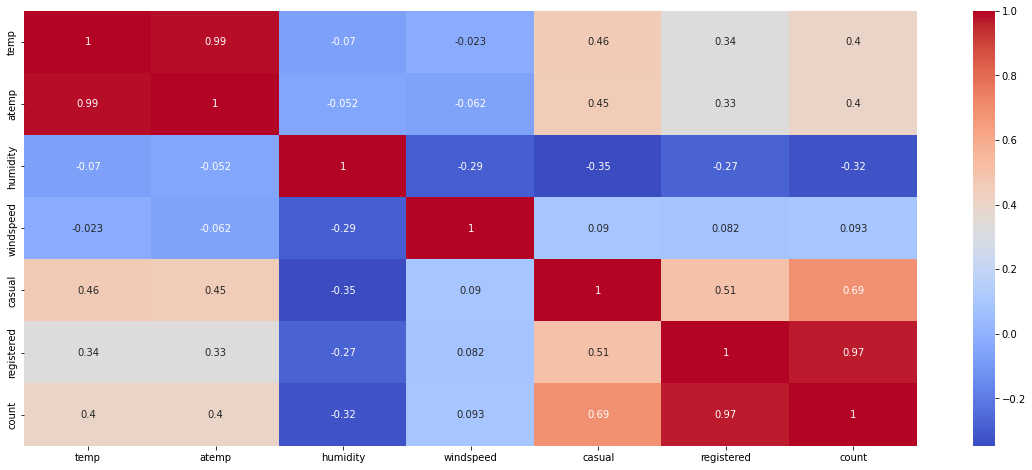

In [40]:
# plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df1.corr()
sns.heatmap((correlation), annot=True,cmap='coolwarm')

In [41]:
df1.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


**CREATE DUMMY VARIABLES**

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [43]:
pd.get_dummies(df1['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


**ONE HOT CODING**

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [44]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

In [45]:
for col in cols:
    df1 = one_hot_encoding(df1, col)
df1.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,16,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,32,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


###**MODEL TRAINING**

**Train Test Split for Regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [46]:
df1= df1.drop(columns=['atemp', 'windspeed', 'casual', 'registered',], axis=1)


In [47]:
# taking x and y
X = df1.drop('count', axis=1)
y = df1['count']

# checkinhg the shape
X.shape, y.shape

((17379, 50), (17379,))

In [48]:
# dividing in to train and test set
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13903, 50), (13903,), (3476, 50), (3476,))

In [49]:
# checking the max and min value in target
print(f"Max Value in Target: {y.max()}")
print(f"Min Value in Target: {y.min()}")

Max Value in Target: 977
Min Value in Target: 1


In [50]:
X_train

,temp,humidity,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
13178,0.80,0.66,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1873,0.36,0.87,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2710,0.64,0.83,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
16227,0.30,0.49,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8832,0.30,0.52,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13285,0.76,0.45,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6745,0.66,0.78,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9526,0.32,0.57,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9771,0.30,0.93,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [51]:
X_test

,temp,humidity,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
12184,0.66,0.69,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6482,0.36,0.87,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4707,0.70,0.84,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6098,0.52,0.48,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
15078,0.60,0.46,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,0.46,0.88,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7386,0.34,0.93,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
11029,0.54,0.32,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
13751,0.64,0.78,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [52]:
# importing RandomForest Regressior
from sklearn.ensemble import  RandomForestRegressor

# creating instance of randomforest regressor
rf_1 = RandomForestRegressor()

# checking the hyperparameter of the randomforest 
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
# first i will create a base model then i will go for hyperparameter tuning.
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
# checking the perofrmance on the training
y_pred_train = rf_1.predict(X_train)

# importing the rmse from sklearn
from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))

RMSE on Traning data 28.798387065689376


In [56]:
# error on testing data
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 75.08729304102017


In [57]:
# chceking the socre.
from sklearn.metrics import r2_score

print('Score: {}'.format(r2_score(y_test, y_pred_test)))


Score: 0.8266107015224001


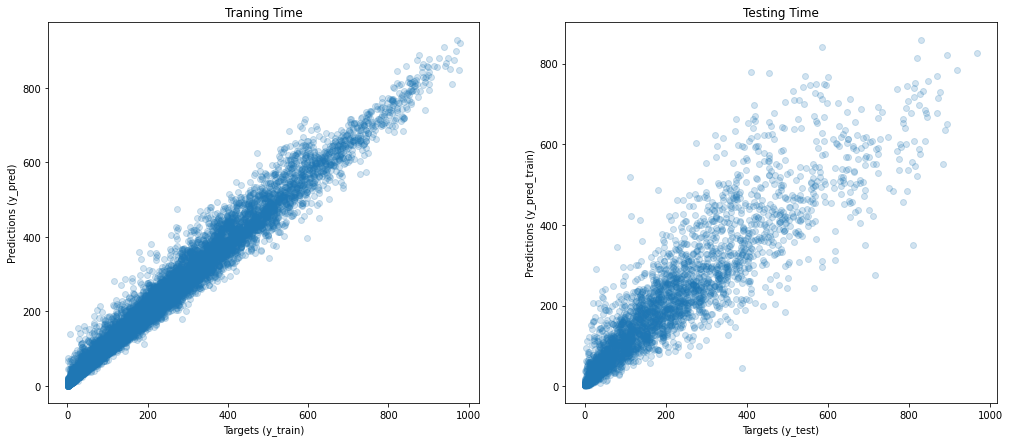

In [58]:
# plotting the traning
# check the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');

In [59]:
# starting hyperparameter tuning

# performing hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# creating instance of RandomForest 
rf_random = RandomForestRegressor()

# creating random parameter
random_grid = {'bootstrap': [True, False],
 'max_depth': [3,5,7,None], # maximum number of levels in each decision tree
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2,3, 5,8],
 'n_estimators': [100,150,200,300]} # how many decision trees

# create an instance of randomsearch cv
rf_random = RandomizedSearchCV(estimator=rf_random,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=8,
                               n_jobs=-1)

# starting the search
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5, 8],
                                        'n_estimators': [100, 150, 200, 300]},
                   verbose=8)

In [60]:
# checking the score
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_

(RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 3,
  'min_samples_leaf': 2,
  'max_features': 'auto',
  'max_depth': None,
  'bootstrap': True},
 0.8178827639778855)

In [61]:
# checkig score of the randomly tune parameter
# checkng traning error
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))

40.950347967166074

In [62]:
# checking the testing error
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

74.2513008486145

In [63]:
rf_random.predict(X_test)

array([188.30653968, 111.93785317,  16.90130556, ..., 601.85704167,
         7.2475    ,  50.43070833])

In [64]:
# chceking the socre.
from sklearn.metrics import r2_score

print('Score: {}'.format(r2_score(y_test, rf_random.predict(X_test))))

Score: 0.8304501042839368


In [65]:
residuals=y_test-rf_random.predict(X_test)

In [66]:
residuals


12184   -45.306540
6482     94.062147
4707     -5.901306
6098     11.134310
15078   -36.109284
           ...    
10679    12.401012
7386     35.954958
11029    30.142958
13751    -3.247500
405      -9.430708
Name: count, Length: 3476, dtype: float64

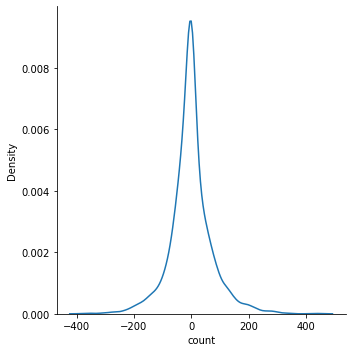

In [67]:
sns.displot(residuals,kind='kde')

In [68]:
#Pickling the Model file for Deployment
import pickle

In [69]:
pickle.dump(rf_random,open('rfmodel.pkl','wb'))

In [70]:
pickle_model=pickle.load(open('rfmodel.pkl','rb'))

In [71]:
rf_random.predict(X_test)

array([188.30653968, 111.93785317,  16.90130556, ..., 601.85704167,
         7.2475    ,  50.43070833])